In [7]:
import pandas as pd
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math

%matplotlib inline

In [8]:
dataframe = pd.read_csv('driving_log.csv')
dataframe.describe()
# dataframe.hist(column='steering')

,timestamp,steering
count,11379.000000,11379.000000
mean,60095.657791,0.000869
std,48817.616687,0.124520
min,0.000000,-0.500000
25%,0.000000,-0.082202
50%,57810.000000,0.000000
75%,103117.500000,0.093049
max,151290.000000,0.472892


In [9]:
images = dataframe.image.values
angles = dataframe.steering.values
times = dataframe.timestamp.values

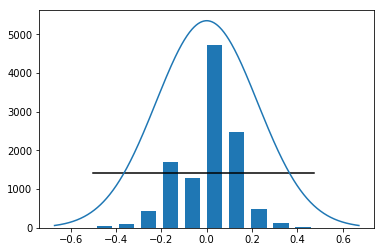

In [22]:
num_bins = 10
avg_samples_per_bin = len(angles)/(num_bins - 2)
hist, bins = np.histogram(angles, num_bins)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.plot((np.min(angles), np.max(angles)), (avg_samples_per_bin, avg_samples_per_bin), 'k-')
mu = 0
variance = 0.05
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
plt.plot(x, 3000*mlab.normpdf(x, mu, sigma))

plt.show()

5185 5185 5185


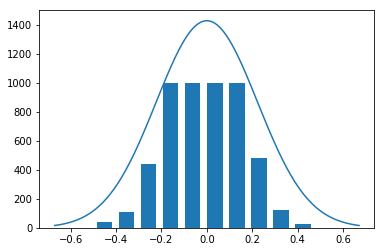

In [29]:
keep_probs = []
target = avg_samples_per_bin * .7
for i in range(num_bins):
    if hist[i] < target:
        keep_probs.append(1.)
    else:
        keep_probs.append(1./(hist[i]/target))
remove_list = []
for i in range(len(angles)):
    for j in range(num_bins):
        if angles[i] > bins[j] and angles[i] <= bins[j+1]:
            # delete from X and y with probability 1 - keep_probs[j]
            if np.random.rand() > keep_probs[j]:
                remove_list.append(i)

images = np.delete(images, remove_list, axis=0)
angles = np.delete(angles, remove_list)
times = np.delete(times, remove_list)
print(len(angles), len(images), len(times))
# print histogram again to show more even distribution of steering angles
hist, bins = np.histogram(angles, num_bins)
plt.bar(center, hist, align='center', width=width)
# plt.plot((np.min(angles), np.max(angles)), (avg_samples_per_bin, avg_samples_per_bin), 'k-')
plt.plot(x, 800*mlab.normpdf(x, mu, sigma))
plt.show()

In [13]:
images

array(['data/IMG/1.jpg', 'data/IMG/5.jpg', 'data/IMG/32.jpg', ...,
       'data/IMG/11364.jpg', 'data/IMG/11370.jpg', 'data/IMG/11378.jpg'], dtype=object)

In [14]:
times

array([ 21120.,  21780.,  23580., ...,      0.,      0.,      0.])

In [15]:
angles

array([ 0.        ,  0.        ,  0.0713595 , ...,  0.12831668,
        0.0903372 ,  0.10118733])

In [16]:
driving_log = np.column_stack((images,times))
driving_log = np.column_stack((driving_log, angles))
driving_log = np.asarray(driving_log)
df = pd.DataFrame(driving_log)
df.to_csv("foo.csv")

In [17]:
df2 = pd.read_csv('foo.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113f4cc18>]], dtype=object)

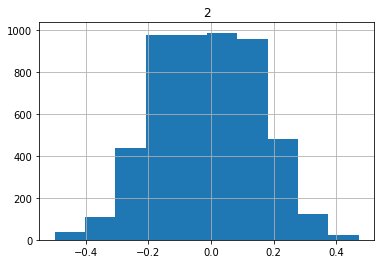

In [18]:
df2.hist(column='2')